<a href="https://colab.research.google.com/github/RamirezArizpe/Ciencia-de-datos-para-negocios/blob/UCA-Inteligencia-Artificial/Clasificaci%C3%B3n_de_candidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6)) # acá dice que para ñla variable tec se va a llamar a numpy su módulo random sólo números enteros entre 70 y 100, para n cantidad de filas y 6 columnas
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,86,72,87,84,88,96,85,76,72,68,82,79,67,75,59,71,85,82
1,71,83,81,90,80,90,80,82,72,66,77,85,66,80,75,50,64,83
2,87,73,96,77,78,83,71,78,70,79,83,81,73,85,79,63,64,59
3,85,78,76,74,93,98,69,62,68,81,74,81,56,78,58,77,73,52
4,89,80,70,98,86,88,63,63,62,61,79,67,54,61,57,63,55,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,77,95,81,89,82,73,74,74,66,80,63,81,50,60,79,68,54,67
4996,72,88,70,93,82,89,86,65,78,66,90,81,83,77,75,73,64,80
4997,89,75,100,81,73,100,78,76,67,85,86,90,62,60,77,66,72,76
4998,97,74,80,93,90,95,66,87,89,61,67,78,83,65,54,66,51,65


In [3]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1) #axis 0 toma el valor por fila y axis 1 lo toma por columna
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [5]:
y # mostrará un vector de clase, que nos da el resultado de todas las clases disponibles, por ende Apto es la primer columna y no apto es las segunda, ver un True en la primer columna y False en la segunda, significa que es apto

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42 # random estate es una semilla, nos ayuda a partir el grupo
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), #1a capa oculta
    Dense(32, activation='relu'), #2a capa oculta
    Dense(16, activation='relu'), #3a capa oculta
    Dense(2, activation='softmax')#es la capa de salida
])

# el modelo empieza con 18 neuronas producto de las 3 atributos medidos inicialmente con 6 variables, son mis entradas, después le pido 64 neuronas, la siguiente 32 neurosa, la siguiente 16 y la final 2

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8, #indica con cuanta muestra va a entrenar el modelo, si es 1 es con todo, y si es 8 es con una parte, cuando se tiene muchos datos, es mejor no entrenar con todos para evitar un overfitting
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7682 - loss: 0.4343 - val_accuracy: 0.9590 - val_loss: 0.0922
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9673 - loss: 0.0799 - val_accuracy: 0.9760 - val_loss: 0.0562
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9830 - val_loss: 0.0425
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9822 - loss: 0.0405 - val_accuracy: 0.9800 - val_loss: 0.0426
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0251 - val_accuracy: 0.9800 - val_loss: 0.0474
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0199 - val_accuracy: 0.9810 - val_loss: 0.0548
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0167 - val_accuracy: 0.9770 - val_loss: 0.0535
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.

In [10]:
# accuracy  y loss son valores del modelo de entrenamiento
# value accuracy y validity loss son del test
# deben de ir a la par ambas columnas de valores, pero si no se hacen se puede hacer un sobre ajusto o

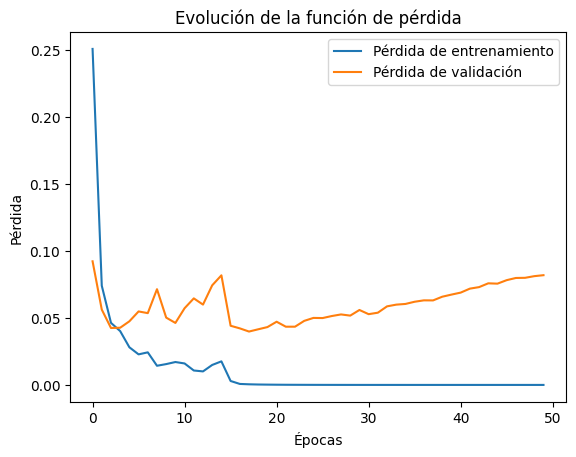

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9917 - loss: 0.0472

🔹 Loss: 0.0818  |  Accuracy: 0.9880


In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


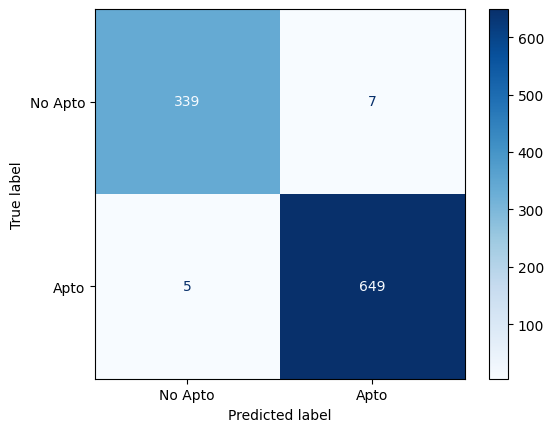


Sensitivity (Recall) por clase:
No Apto: 0.98
Apto: 0.99


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [13]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Evaluación de nuevo candidato:
Resultado: Apto
